In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from IPython.display import display

In [2]:
pd.set_option('display.max_rows',1000)

In [21]:
TRAIN_PATH='../input/sales_train.csv'
TEST_PATH='../input/test.csv'
SAMPLE_PATH='../input/sample_submission.csv'
ITEM_PATH='../input/items.csv'
ITEM_CATEGORIES_PATH='../input/item_categories.csv'
SHOP_PATH='../input/shops.csv'

In [22]:
train=pd.read_csv(TRAIN_PATH)
test=pd.read_csv(TEST_PATH)
sample=pd.read_csv(SAMPLE_PATH)
item=pd.read_csv(ITEM_PATH)
item_categoriies=pd.read_csv(ITEM_CATEGORIES_PATH)
shop=pd.read_csv(SHOP_PATH)

In [25]:
print(train.shape)
print(test.shape)
print(sample.shape)
print(item.shape)
print(item_categoriies.shape)
print(shop.shape)

(2935849, 6)
(214200, 3)
(214200, 2)
(22170, 3)
(84, 2)
(60, 2)


In [23]:
# date_block_numが何年の何月かの区分を表すので便利。
display(train.head())
import datetime
# 時刻データを決められた形に変換
train.date=train.date.apply(lambda x:datetime.datetime.strptime(x,'%d.%m.%Y'))
display(train.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [51]:
# 店のIdとitemのIDが含まれる、ターゲットは一か月あたりの、各店舗の商品の購入数。
display(test.head(1000))

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [43]:
display(sample.head())

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [56]:
# 商品の名前とid,カテゴリーidがついている
display(item.head(100))

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [45]:
display(item_categoriies.head())

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [48]:
display(shop.head())

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [33]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [50]:
train.head(100)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [38]:
print(np.unique(train['date_block_num']))
print(np.unique(train['shop_id']))
print(np.unique(train['item_id']))
print(np.unique(train['item_price']))
print(np.unique(train['item_cnt_day']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
[    0     1     2 ... 22167 22168 22169]
[-1.0000e+00  7.0000e-02  8.7500e-02 ...  5.0999e+04  5.9200e+04
  3.0798e+05]
[-2.200e+01 -1.600e+01 -9.000e+00 -6.000e+00 -5.000e+00 -4.000e+00
 -3.000e+00 -2.000e+00 -1.000e+00  1.000e+00  2.000e+00  3.000e+00
  4.000e+00  5.000e+00  6.000e+00  7.000e+00  8.000e+00  9.000e+00
  1.000e+01  1.100e+01  1.200e+01  1.300e+01  1.400e+01  1.500e+01
  1.600e+01  1.700e+01  1.800e+01  1.900e+01  2.000e+01  2.100e+01
  2.200e+01  2.300e+01  2.400e+01  2.500e+01  2.600e+01  2.700e+01
  2.800e+01  2.900e+01  3.000e+01  3.100e+01  3.200e+01  3.300e+01
  3.400e+01  3.500e+01  3.600e+01  3.700e+01  3.800e+01  3.900e+01
  4.000e+01  4.100e+01  4.200e+01  4.300e+01  4.400e+0

In [40]:
train.head(100)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [38]:
# date_block_numとshop_id,item_idでグルーピングを行なう
monthly_sales=train.groupby(['date_block_num','shop_id','item_id'])
# date,item_price,item_cnt_dayのみを表示し、dateには最大、最小値をとり、item_priceには平均、item_cnt_dayには合計を求める
monthly_sales=monthly_sales['date','item_price','item_cnt_day'].agg({'date':['min','max'],'item_price':'mean','item_cnt_day':'sum'})

In [39]:
monthly_sales

date               item_price  \
                                      min        max          mean   
date_block_num shop_id item_id                                       
0              0       32      2013-01-03 2013-01-31    221.000000   
                       33      2013-01-03 2013-01-28    347.000000   
                       35      2013-01-31 2013-01-31    247.000000   
                       43      2013-01-31 2013-01-31    221.000000   
                       51      2013-01-13 2013-01-31    128.500000   
                       61      2013-01-10 2013-01-10    195.000000   
                       75      2013-01-17 2013-01-17     76.000000   
                       88      2013-01-16 2013-01-16     76.000000   
                       95      2013-01-06 2013-01-06    193.000000   
                       96      2013-01-10 2013-01-10     70.000000   
                       98      2013-01-04 2013-01-31    268.000000   
                       111     2013-01-17 2013-01-17     89.000000   
                       149     2013-01-11 2013-01-28     99.000000   
                       151     2013-01-16 2013-01-16     75.000000   
                       153     2013-01-09 2013-01-09    258.000000   
                       198     2013-01-10 2013-01-10    112.000000   
                       210     2013-01-05 2013-01-25    118.000000   
                       282     2013-01-04 2013-01-04    109.000000   
                       306     2013-01-22 2013-01-22     59.000000   
                       351     2013-01-21 2013-01-21     89.000000   
                       421     2013-01-07 2013-01-07    162.000000   
                       438     2013-01-31 2013-01-31    162.000000   
                       482     2013-01-09 2013-01-14   1360.000000   
                       484     2013-01-09 2013-01-30    124.000000   
                       491     2013-01-27 2013-01-27    361.000000   
                       498     2013-01-19 2013-01-19    124.000000   
                       556     2013-01-15 2013-01-25     90.000000   
                       642     2013-01-06 2013-01-20     90.000000   
                       651     2013-01-09 2013-01-25     90.000000   
                       657     2013-01-03 2013-01-18     90.000000   
                       668     2013-01-18 2013-01-18     91.000000   
                       677     2013-01-03 2013-01-18     90.000000   
                       699     2013-01-11 2013-01-26    143.000000   
                       700     2013-01-08 2013-01-29    143.000000   
                       715     2013-01-09 2013-01-26     91.000000   
                       783     2013-01-04 2013-01-04     71.000000   
                       810     2013-01-06 2013-01-25    120.000000   
                       835     2013-01-11 2013-01-11   1896.000000   
                       839     2013-01-26 2013-01-29   1360.000000   
                       944     2013-01-14 2013-01-14    339.000000   
                       947     2013-01-05 2013-01-10     37.000000   
                       952     2013-01-12 2013-01-12    321.000000   
                       963     2013-01-04 2013-01-17     36.000000   
                       965     2013-01-31 2013-01-31    190.000000   
                       987     2013-01-10 2013-01-15     77.000000   
                       989     2013-01-06 2013-01-06     58.000000   
                       990     2013-01-03 2013-01-09     58.000000   
                       992     2013-01-06 2013-01-28     58.000000   
                       993     2013-01-04 2013-01-07     58.000000   
                       996     2013-01-09 2013-01-19     58.000000   
                       997     2013-01-08 2013-01-08     58.000000   
                       998     2013-01-03 2013-01-03     58.000000   
                       999     2013-01-03 2013-01-20     58.000000   
                       1000    2013-01-03 2013-01-20     58.000000   
                       1001    2013-01-03 2013-

In [45]:
item.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [57]:
x=item.groupby(['item_category_id']).count()
display(x.head(3))
#item_idが大きい順に並び替え
x=x.sort_values(by='item_id',ascending=False)
display(x.head(3))
# 上位１０個のitemを取り出す
x=x.iloc[:10]
x=x.reset_index()
# index番号をリセット
display(x.head(3))

,item_name,item_id
item_category_id,,
0,4,4
1,2,2
2,75,75


,item_name,item_id
item_category_id,,
40,5035,5035
55,2365,2365
37,1780,1780


,item_category_id,item_name,item_id
0,40,5035,5035
1,55,2365,2365
2,37,1780,1780


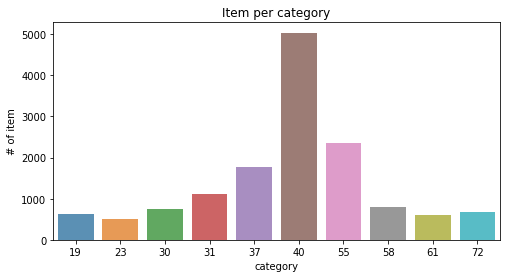

In [60]:
#カテゴリーごとのitemの数を表示
plt.figure(figsize=(8,4))
sns.barplot(x.item_category_id,x.item_id,alpha=0.8)
plt.title('Item per category')
plt.xlabel('category')
plt.ylabel('# of item')
plt.show()

date_block_num
0    131479.0
1    128090.0
2    147142.0
Name: item_cnt_day, dtype: float64


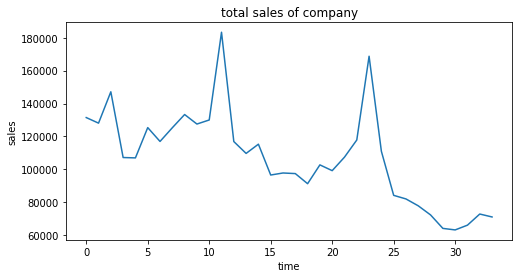

In [70]:
# 各会社のitem_cnt_dayの合計を表示する
total_sales=train.groupby(['date_block_num'])['item_cnt_day'].sum()
print(total_sales[:3])
total_sales.astype('float')
plt.figure(figsize=(8,4))
plt.plot(total_sales[0],)
plt.title('total sales of company')
plt.xlabel('time')
plt.ylabel('sales')
plt.show()

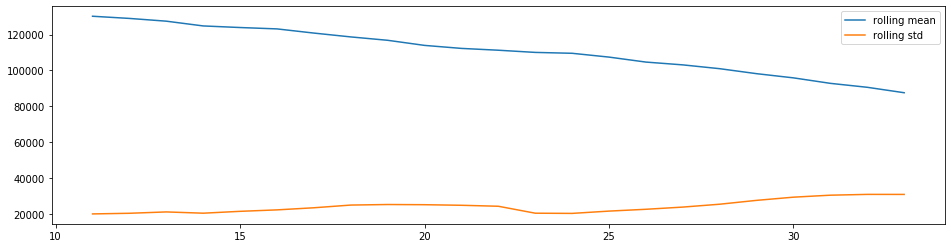

In [83]:
plt.figure(figsize=(16,4))
## 12要素前まで遡って、平均を計算する。
plt.plot(total_sales.rolling(window=12,center=False).mean(),label='rolling mean')
plt.plot(total_sales.rolling(window=12,center=False).std(),label='rolling std')
plt.legend()
plt.show()

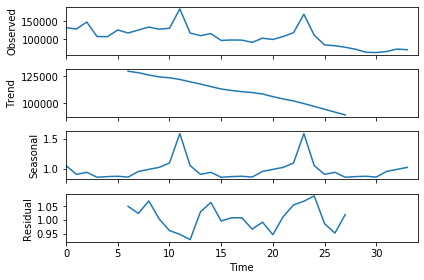

In [86]:
# statsmodels.apiで、周期的なデータを可視化するのに役立つ。
import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(total_sales.values,freq=12,model='multiplicative')
fig=res.plot()

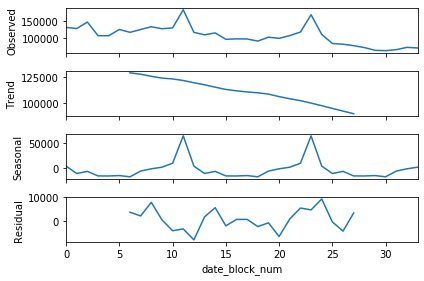

In [87]:
res=sm.tsa.seasonal_decompose(total_sales,freq=12,model='additive')
fig=res.plot()

In [100]:
# date_block_numでグルーピングして、各アイテムの個数を合計する。
ts=train.groupby(['date_block_num'])['item_cnt_day'].sum()
display(ts[:5])
#　インデックスを、期間にする
ts.index=pd.date_range(start='2013-01-01',end='2015-10-01',freq='MS')
display(ts[:5])
# インデックス番号を初期化することで、期間を要素とする
ts=ts.reset_index()
display(ts.head())

date_block_num
0    131479.0
1    128090.0
2    147142.0
3    107190.0
4    106970.0
Name: item_cnt_day, dtype: float64

2013-01-01    131479.0
2013-02-01    128090.0
2013-03-01    147142.0
2013-04-01    107190.0
2013-05-01    106970.0
Freq: MS, Name: item_cnt_day, dtype: float64

,index,item_cnt_day
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


## facebookの出した、時系列データの回帰モデルを使う

In [108]:
from fbprophet import Prophet
ts.columns=['ds','y']
model = Prophet( yearly_seasonality=True) #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(ts) 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
future = model.make_future_dataframe(periods = 5, freq = 'MS')  
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,83193.957416,79844.405060,86182.072363
35,2015-12-01,125513.063181,122656.765518,128591.354728
36,2016-01-01,75625.688717,72410.253235,78692.458601
37,2016-02-01,40109.144632,36850.246961,43304.545509
38,2016-03-01,76664.084927,73629.984991,79864.515882


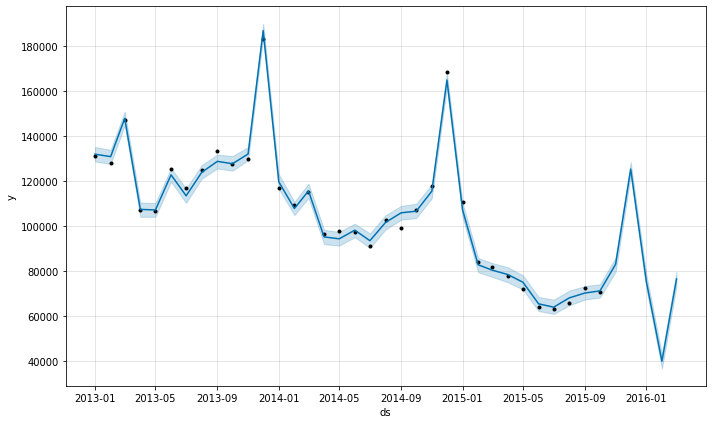

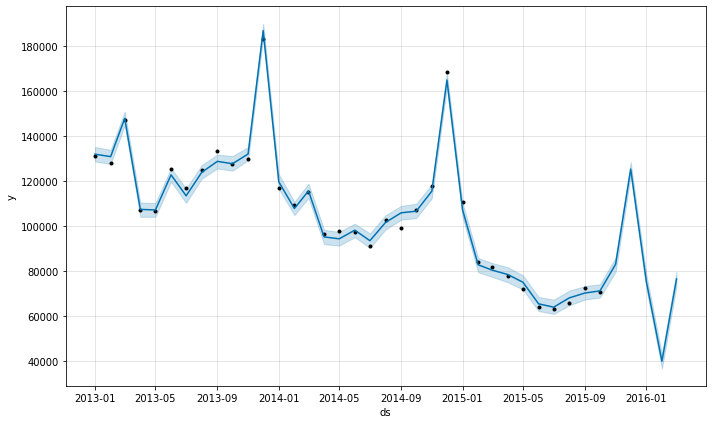

In [111]:
model.plot(forecast)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003
